## 1. Load Data


In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv("data/Train.csv")
df_train.head()


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
import airportsdata

airports = airportsdata.load("IATA")  # key is IATA code
print(airports["TUN"])


{'icao': 'DTTA', 'iata': 'TUN', 'name': 'Tunis Carthage International Airport', 'city': 'Tunis', 'subd': 'Tunis', 'country': 'TN', 'elevation': 22.0, 'lat': 36.8510017395, 'lon': 10.2271995544, 'tz': 'Africa/Tunis'}


In [5]:
df_test = pd.read_csv("data/Test.csv")
df_test.head()


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [6]:
from geopy import merge_geodata
from geopy import get_geodata

# add geodata to dataframe
geo_data_train = get_geodata(df_train.DEPSTN, df_train.ARRSTN)
geo_data_test = get_geodata(df_test.DEPSTN, df_test.ARRSTN)

df_train_geo = merge_geodata(df_train, geo_data_train, 'DEPSTN')
df_train_geo = merge_geodata(df_train_geo, geo_data_train, 'ARRSTN')

df_test_geo = merge_geodata(df_test, geo_data_test, 'DEPSTN')
df_test_geo = merge_geodata(df_test_geo, geo_data_test, 'ARRSTN')

df_train_geo 

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,iata_DEPSTN,country_DEPSTN,lat_DEPSTN,lon_DEPSTN,elevation_DEPSTN,iata_ARRSTN,country_ARRSTN,lat_ARRSTN,lon_ARRSTN,elevation_ARRSTN
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,CMN,MA,33.367500,-7.58997,656.0,TUN,TN,36.851002,10.22720,22.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,MXP,IT,45.630600,8.72811,768.0,TUN,TN,36.851002,10.22720,22.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,TUN,TN,36.851002,10.22720,22.0,IST,TR,41.275333,28.75200,325.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,DJE,TN,33.875000,10.77550,19.0,NTE,FR,47.153198,-1.61073,90.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,TUN,TN,36.851002,10.22720,22.0,ALG,DZ,36.691002,3.21541,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,TUN,TN,36.851002,10.22720,22.0,TUN,TN,36.851002,10.22720,22.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,DJE,TN,33.875000,10.77550,19.0,TUN,TN,36.851002,10.22720,22.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,TUN,TN,36.851002,10.22720,22.0,TUN,TN,36.851002,10.22720,22.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,TUN,TN,36.851002,10.22720,22.0,DJE,TN,33.875000,10.77550,19.0


In [7]:
df_train_geo_wo_target_zero = df_train_geo[df_train_geo['target'] != 0]

In [8]:
df_train_geo_wo_target_zero.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,iata_DEPSTN,country_DEPSTN,lat_DEPSTN,lon_DEPSTN,elevation_DEPSTN,iata_ARRSTN,country_ARRSTN,lat_ARRSTN,lon_ARRSTN,elevation_ARRSTN
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,CMN,MA,33.367500,-7.58997,656.0,TUN,TN,36.851002,10.22720,22.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,MXP,IT,45.630600,8.72811,768.0,TUN,TN,36.851002,10.22720,22.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,TUN,TN,36.851002,10.22720,22.0,ALG,DZ,36.691002,3.21541,82.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0,TLS,FR,43.629101,1.36382,499.0,TUN,TN,36.851002,10.22720,22.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0,TUN,TN,36.851002,10.22720,22.0,BCN,ES,41.297100,2.07846,12.0


In [9]:
df_train_geo_wo_target_zero.info

<bound method DataFrame.info of                      ID       DATOP     FLTID DEPSTN ARRSTN  \
0            train_id_0  2016-01-03  TU 0712     CMN    TUN   
1            train_id_1  2016-01-13  TU 0757     MXP    TUN   
4            train_id_4  2016-01-17  TU 0338     TUN    ALG   
5            train_id_5  2016-01-17  TU 0283     TLS    TUN   
6            train_id_6  2016-01-18  TU 0514     TUN    BCN   
...                 ...         ...       ...    ...    ...   
107447  train_id_107447  2018-04-18  TU 0700     TUN    DJE   
107495  train_id_107495  2018-12-05  TU 0635     ORY    DJE   
107528  train_id_107528  2018-12-05  TU 0669     BRU    DJE   
107592  train_id_107592  2018-12-04  TU 0723     ORY    TUN   
107675  train_id_107675  2018-11-04  TU 0734     DJE    DJE   

                        STD                  STA STATUS         AC  target  \
0       2016-01-03 10:30:00  2016-01-03 12.55.00    ATA  TU 32AIMN   260.0   
1       2016-01-13 15:05:00  2016-01-13 16.55.00    ATA

(0.0, 1000.0)

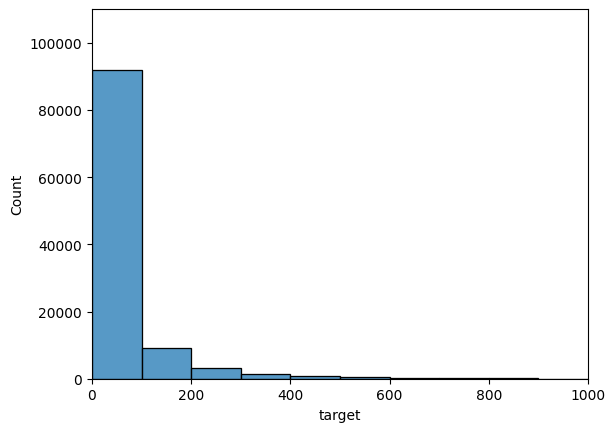

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_train_geo, x='target', binwidth = 100) #Minutes delayed classified
plt.ylim(0, 110000)
plt.xlim(0, 1000)

(0.0, 20.0)

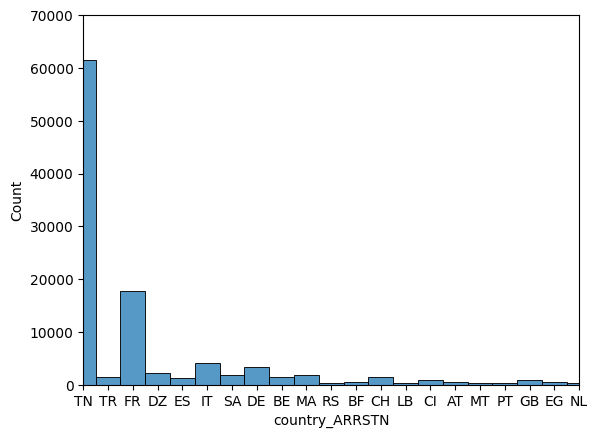

In [18]:
sns.histplot(df_train_geo, x='country_ARRSTN') #Delay classified according to arrival country
plt.ylim(0, 70000)
plt.xlim(0, 20)

(0.0, 20.0)

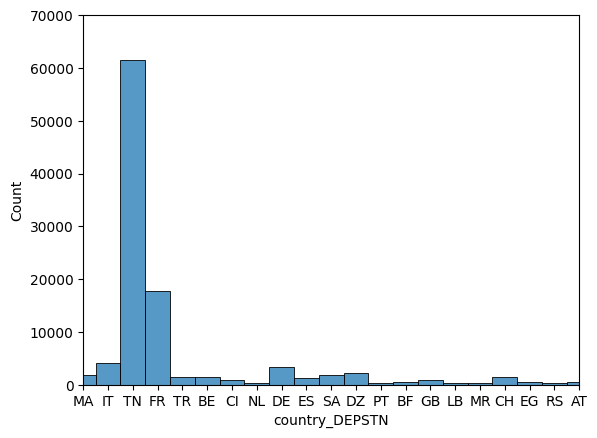

In [19]:
sns.histplot(df_train_geo, x='country_DEPSTN') #Delay classified according to departure country
plt.ylim(0, 70000)
plt.xlim(0, 20)

(0.0, 20.0)

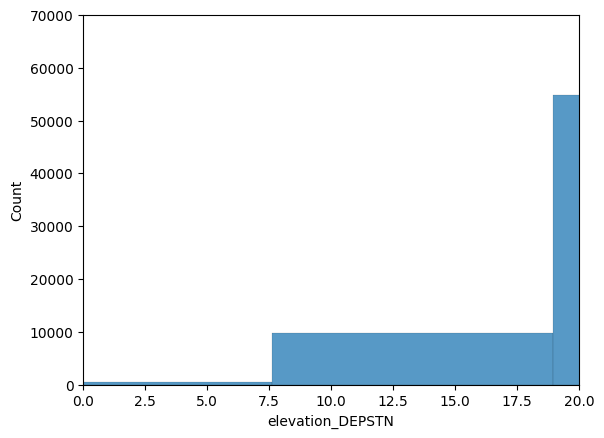

In [20]:
sns.histplot(df_train_geo, x='elevation_DEPSTN') #Delay classified according to departure elevation
plt.ylim(0, 70000)
plt.xlim(0, 20)

(0.0, 20.0)

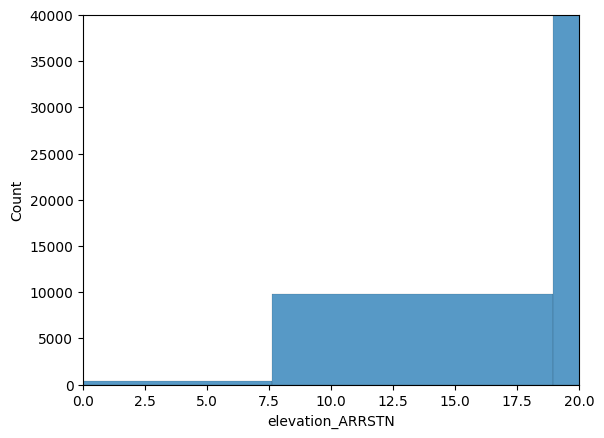

In [21]:
sns.histplot(df_train_geo, x='elevation_ARRSTN') #Delay classified according to arrival elevation
plt.ylim(0, 40000)
plt.xlim(0, 20)

In [25]:
df_train_geo.to_csv ('data/df_geo.csv')

In [26]:
df_test_geo.to_csv ('data/df_geo_test.csv')

In [35]:
df_train_geo[(df_train_geo['target'] > 0) & (df_train_geo['country_DEPSTN'] = 'TUN') ]

SyntaxError: invalid syntax (325210536.py, line 1)

In [34]:
df_train_geo.mean().plot(kind='bar')


KeyboardInterrupt: 

<AxesSubplot:xlabel='country_ARRSTN', ylabel='target'>

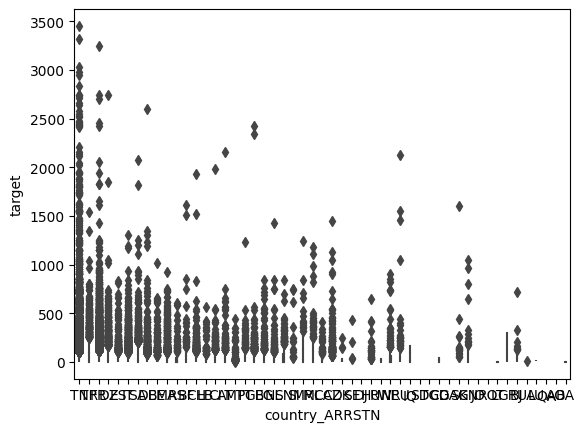

In [42]:
sns.boxplot(data=df_train_geo, x="country_ARRSTN", y="target",  width=0.01)